In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
db = pd.read_excel('Detections_of_IBC_2018_07_06.xlsx', sheet_name='Detections_of_IBC')

In [85]:
db.head(3)

,Route,BorderLocation,NationalityLong,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
0,Black Sea,Sea,Iraq,0,0,0,0,0,0,0,...,134,301,0,60,0,0,0,0,0,0
1,Black Sea,Sea,Pakistan,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
2,Black Sea,Sea,Syria,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
db.Route.unique()

array(['Black Sea', 'Central Mediterranean',
       'Circular Route from Albania to Greece', 'Eastern Land Borders',
       'Eastern Mediterranean', 'Other', 'Western African',
       'Western Balkans', 'Western Mediterranean'], dtype=object)

In [87]:
db_westernMed = db[(db.Route == 'Western Mediterranean')]
db_westernMed.head()

,Route,BorderLocation,NationalityLong,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
629,Western Mediterranean,Land,Guinea,0,0,0,0,0,0,0,...,106,2,6,8,15,8,0,17,11,7
630,Western Mediterranean,Land,Burkina Faso,0,0,0,0,0,0,0,...,1,7,0,3,2,179,0,1,3,0
631,Western Mediterranean,Land,Algeria,48,47,57,31,32,20,30,...,0,0,0,3,3,0,0,1,2,0
632,Western Mediterranean,Land,Gambia,0,0,0,0,0,0,0,...,46,0,0,2,1,5,0,1,0,0
633,Western Mediterranean,Land,Sierra Leone,0,0,0,0,0,0,0,...,1,0,0,1,0,2,0,0,2,0


In [88]:
westernMed_sum = db_westernMed.groupby(['Route']).sum()

In [89]:
# optional mask for excluding 2009 data (not very reliable)

# mask = pd.DatetimeIndex(db.columns[3:]) > pd.to_datetime('2010')
# mask = np.insert(mask,[0,0,0],[True,True,True])
# mask

#db_centralMed = db_centralMed.loc[:,mask].groupby(db_centralMed.Route).sum()

In [90]:
westernMed_sum

,2009-01-01 00:00:00,2009-02-01 00:00:00,2009-03-01 00:00:00,2009-04-01 00:00:00,2009-05-01 00:00:00,2009-06-01 00:00:00,2009-07-01 00:00:00,2009-08-01 00:00:00,2009-09-01 00:00:00,2009-10-01 00:00:00,...,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00,2018-05-01 00:00:00
Route,,,,,,,,,,,,,,,,,,,,,
Western Mediterranean,508,302,656,423,557,740,671,714,338,1036,...,2450,1527,3516,3802,2046,1612,1071,870,1247,3533


In [91]:
westernMed_sum = westernMed_sum.transpose()

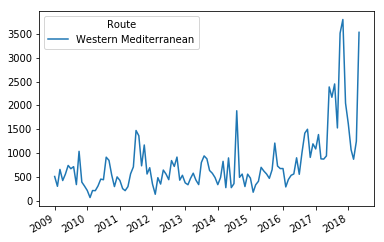

In [92]:
westernMed_sum.plot()

In [93]:
# taking the log to normalise the data

# centralMed_sum['Central Mediterranean'] = np.log(centralMed_sum['Central Mediterranean'])
# centralMed_sum.tail()

In [99]:
westernMed_new = westernMed_sum.reset_index()

In [100]:
westernMed_new = westernMed_new.rename(columns={'index':'ds', 'Western Mediterranean':'y'})

In [102]:
from fbprophet import Prophet
model = Prophet()

In [103]:
model.fit(westernMed_new)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/srv/conda/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [104]:
future = model.make_future_dataframe(periods=12, freq='M')
future.tail()

,ds
120,2018-12-31
121,2019-01-31
122,2019-02-28
123,2019-03-31
124,2019-04-30


In [105]:
forecast = model.predict(future)

In [106]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
120,2018-12-31,2124.230532,1439.397363,2509.640435,2112.051573,2135.623476,-151.927441,-151.927441,-151.927441,-151.927441,-151.927441,-151.927441,0.0,0.0,0.0,1972.303090
121,2019-01-31,2158.670940,1226.727210,2289.407051,2144.084852,2172.370503,-411.070857,-411.070857,-411.070857,-411.070857,-411.070857,-411.070857,0.0,0.0,0.0,1747.600083
122,2019-02-28,2189.778405,1420.204268,2458.161521,2172.216046,2206.035013,-256.717738,-256.717738,-256.717738,-256.717738,-256.717738,-256.717738,0.0,0.0,0.0,1933.060667
123,2019-03-31,2224.218813,1407.933945,2440.194051,2203.380729,2243.833452,-319.896593,-319.896593,-319.896593,-319.896593,-319.896593,-319.896593,0.0,0.0,0.0,1904.322220
124,2019-04-30,2257.548240,1896.886666,2971.369689,2233.770059,2279.880316,171.521328,171.521328,171.521328,171.521328,171.521328,171.521328,0.0,0.0,0.0,2429.069568


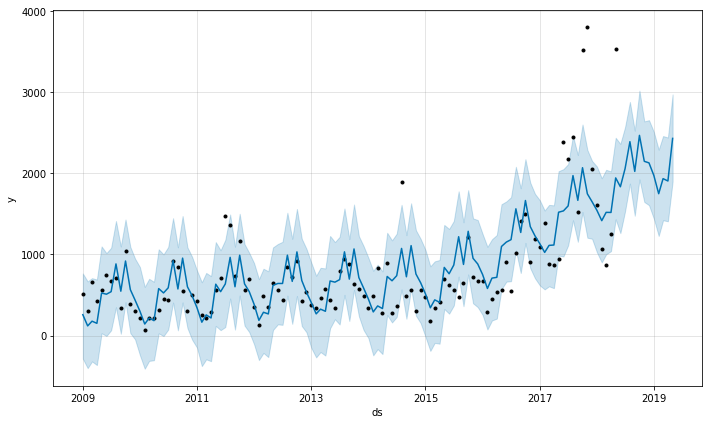

In [107]:
fig1 = model.plot(forecast)

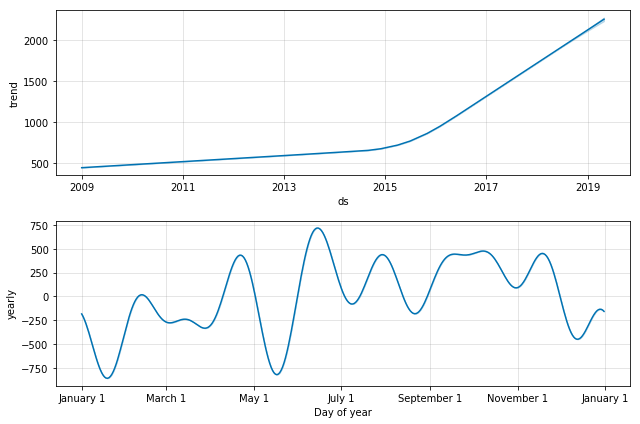

In [114]:
fig2 = model.plot_components(forecast, uncertainty=True)